In [1]:
import stablemotifs
import biolqm
from colomoto_jupyter import tabulate
import pandas as pd

This notebook has been executed using the docker image `colomoto/colomoto-docker:2020-07-01`

Lets import the Bladder Cancer model from Remy et al. 2015 (DOI: 10.1158/0008-5472.CAN-15-0602) and run the StableMotifs algorithm

In [2]:
lqm = biolqm.load("http://ginsim.org/sites/default/files/Bladder_Model.zginml")

Downloading http://ginsim.org/sites/default/files/Bladder_Model.zginml

In [3]:
inputs = {
    "EGFR_stimulus": 1,
    "FGFR3_stimulus": 1,
    "GrowthInhibitors": 1
}
target = {"Apoptosis_b1": 1, "RB1": 1}

In [4]:
%time stm = stablemotifs.load(lqm, inputs)


Filename: model.txt
Creating Boolean table directory: model
Boolean table directory created.
Creating functions and names files.
Functions and names files created.
Performing network reduction...
The number of source nodes without specified states is 1
Source combination 1/2:	DNAdamage=0	
Finding stable motifs in this network...
There are 2 stable motifs in this network: 
1/2	RB1=0	p16INK4a=1	
2/2	EGFR=0	FGFR3=1	GRB2=0	RAS=1	SPRY=1	
Performing network reduction using motif 1/2...
Performing network reduction using motif 2/2...
Source combination 2/2:	DNAdamage=1	
Finding stable motifs in this network...
There are 3 stable motifs in this network: 
1/3	RB1=0	p16INK4a=1	
2/3	RB1=1	p16INK4a=0	
3/3	EGFR=0	FGFR3=1	GRB2=0	RAS=1	SPRY=1	
Performing network reduction using motif 1/3...
Performing network reduction using motif 2/3...
Performing network reduction using motif 3/3...
Network reduction complete.
Removing duplicate quasi-attractors.
Total number of quasi-attractors: 5
Number of putat

Lets display the quasi-attractors, which are compressed representations of the attractors (see Zanudo et al. 2015 for more details).

We will order the attractor according the state of the input signals ("DNAdamage","FGFR3_stimulus","EGFR_stimulus","GrowthInhibitors")

In [5]:
res=pd.DataFrame(stm.attractors)
inputs=["DNAdamage","FGFR3_stimulus","EGFR_stimulus","GrowthInhibitors"]
res2=res[inputs+[x for x in res.columns if x not in inputs]]
tabulate(res2.sort_values(by=inputs))

,DNAdamage,FGFR3_stimulus,EGFR_stimulus,GrowthInhibitors,Growth_Arrest,Proliferation,Apoptosis_b2,Apoptosis_b1,CHEK1_2_b2,CHEK1_2_b1,CyclinE1,p16INK4a,CyclinD1,CyclinA,E2F3_b1,E2F3_b2,E2F1_b2,E2F1_b1,CDC25A,p21CIP,p14ARF,ATM_b1,ATM_b2,FGFR3,TP53,GRB2,MDM2,RBL2,PI3K,EGFR,PTEN,SPRY,AKT,RAS,RB1
1,0,1,1,1,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1
0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
4,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,1,1
3,1,1,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,1,0


We can now calculate the stable motifs and the control sets for each of these attractors

In [6]:
stm.stable_motifs

[{'RB1': 0, 'p16INK4a': 1},
 {'EGFR': 0, 'FGFR3': 1, 'GRB2': 0, 'RAS': 1, 'SPRY': 1},
 {'CyclinE1': 0, 'RBL2': 1},
 {'CyclinE1': 0, 'p21CIP': 1},
 {'CDC25A': 1, 'CyclinE1': 1, 'RBL2': 0, 'p21CIP': 0},
 {'CDC25A': 1, 'CyclinE1': 1, 'E2F3_b1': 1, 'RB1': 0, 'RBL2': 0, 'p21CIP': 0},
 {'CDC25A': 1, 'CyclinE1': 1, 'E2F1_b1': 1, 'RB1': 0, 'RBL2': 0, 'p21CIP': 0},
 {'RB1': 1, 'p16INK4a': 0}]

We can choose the reprogramming interventions for each attractor in which Apoptosis_b1=1

Note: This does not give the minimal reprogramming intervention for ANY attractor in which Apoptosis_b1=1, but instead gives the minimal reprogramming interventions for each separate attractor in which Apoptosis_b1=1. Finding the minimal reprogramming intervention for ANY attractor in which Apoptosis_b1=1 would require a re-analysis of the stable motif succcession diagram of the model from which the reprogramming interventions are obtained. For more details on the stable motif succession diagram see Zanudo et al 2015 (DOI: 10.1371/journal.pcbi.1004193). As an example, a minimal reprogramming intervention for ANY attractor in which Apoptosis_b1=1 would be {DNAdamage=1}, since after the input signal DNAdamage is set to 1, all attractors have Apoptosis_b1=1.

In [7]:
s = stm.reprogramming_to_attractor(target)
s

[FromCondition('input', TemporaryPerturbation(DNAdamage=1, RB1=1)),
 FromCondition('input', TemporaryPerturbation(DNAdamage=1, p16INK4a=0))]

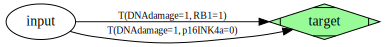

In [8]:
s.as_graph()

In [9]:
s.as_table()

,DNAdamage,RB1,p16INK4a
0,1,,0
1,1,1,
